In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter 
from wordcloud import WordCloud
import string
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import GridSearchCV

### 데이터 불러오기

In [2]:
mbti_01 = pd.read_csv(r"D:\bigdata_itwill\semi_project\data\mbti_1.csv")
mbti_01

type                                              posts
0     INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1     ENTP  'I'm finding the lack of me in these posts ver...
2     INTP  'Good one  _____   https://www.youtube.com/wat...
3     INTJ  'Dear INTP,   I enjoyed our conversation the o...
4     ENTJ  'You're fired.|||That's another silly misconce...
...    ...                                                ...
8670  ISFP  'https://www.youtube.com/watch?v=t8edHB_h908||...
8671  ENFP  'So...if this thread already exists someplace ...
8672  INTP  'So many questions when i do these things.  I ...
8673  INFP  'I am very conflicted right now when it comes ...
8674  INFP  'It has been too long since I have been on per...

[8675 rows x 2 columns]

### 데이터 정보 확인

In [3]:
mbti_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8675 non-null   object
 1   posts   8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB


In [4]:
mbti_01.isnull().sum()

type     0
posts    0
dtype: int64

In [5]:
mbti_01['type'].unique()

array(['INFJ', 'ENTP', 'INTP', 'INTJ', 'ENTJ', 'ENFJ', 'INFP', 'ENFP',
       'ISFP', 'ISTP', 'ISFJ', 'ISTJ', 'ESTP', 'ESFP', 'ESTJ', 'ESFJ'],
      dtype=object)

In [6]:
mbti_01['type'].value_counts()

type
INFP    1832
INFJ    1470
INTP    1304
INTJ    1091
ENTP     685
ENFP     675
ISTP     337
ISFP     271
ENTJ     231
ISTJ     205
ENFJ     190
ISFJ     166
ESTP      89
ESFP      48
ESFJ      42
ESTJ      39
Name: count, dtype: int64

### mbit 타입별 게시글 수 막대차트

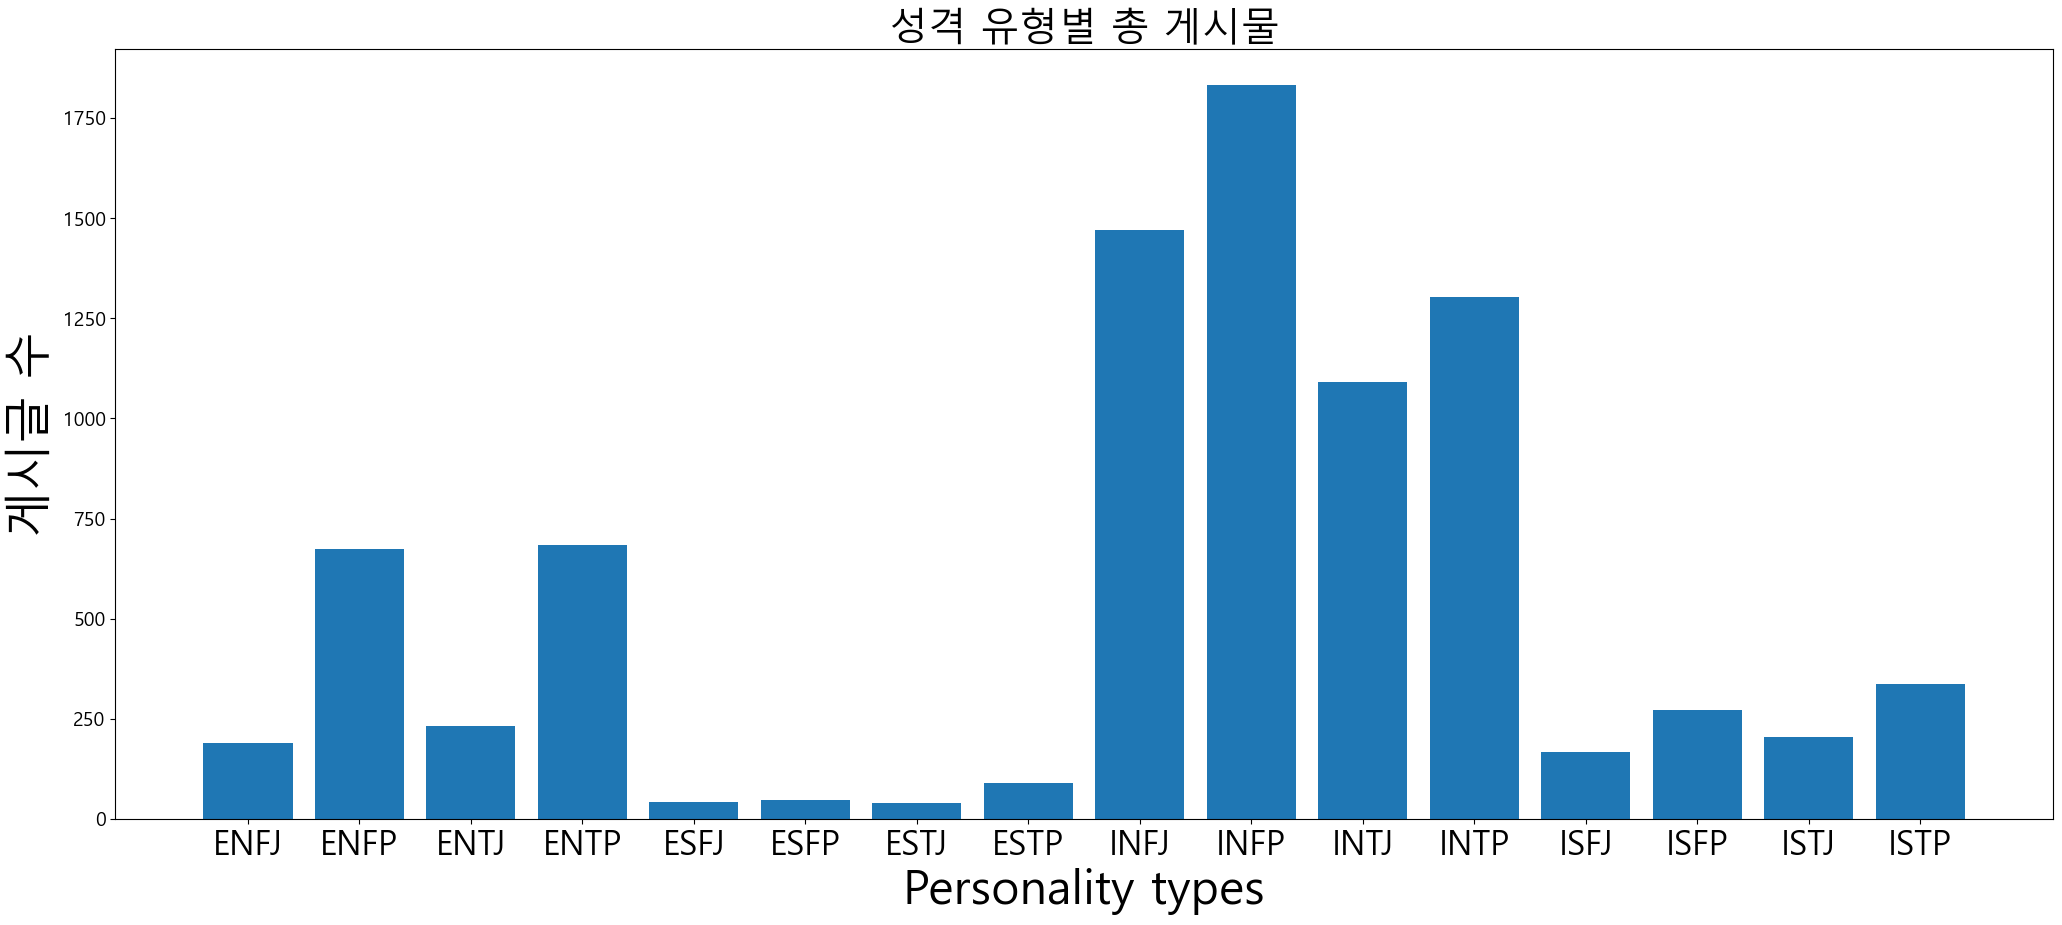

In [7]:
post_type = mbti_01.groupby(['type']).count()
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure(figsize=(25, 10))
plt.bar(post_type.index, height=post_type['posts'])
plt.xlabel('Personality types', size=34)
plt.ylabel('게시글 수', size=34)
plt.title('성격 유형별 총 게시물', size=28)
plt.xticks(fontsize=24) 
plt.yticks(fontsize=14)  
plt.show()

### mbti 타입별 게시글 수 파이 차트

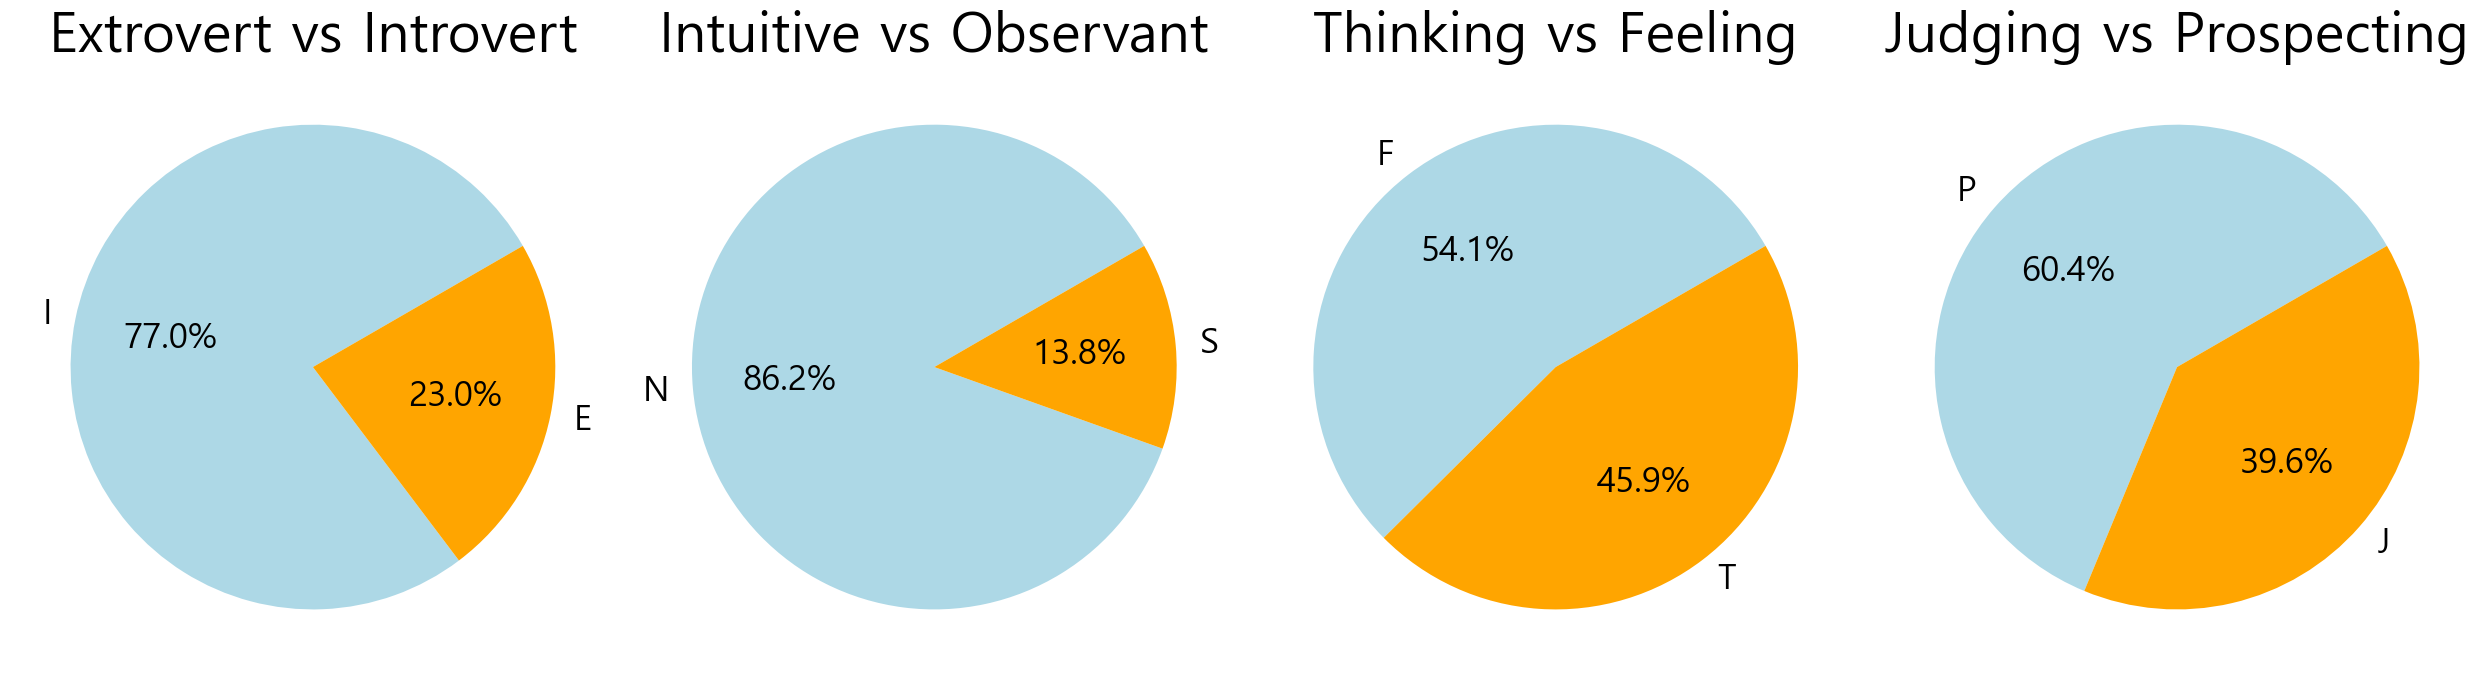

In [8]:
# 타입별 나누기
mbti_01['I/E'] = mbti_01['type'].str[0]
mbti_01['N/S'] = mbti_01['type'].str[1]
mbti_01['T/F'] = mbti_01['type'].str[2]
mbti_01['J/P'] = mbti_01['type'].str[3]

count_ie = mbti_01['I/E'].value_counts()
count_ns = mbti_01['N/S'].value_counts()
count_tf = mbti_01['T/F'].value_counts()
count_jp = mbti_01['J/P'].value_counts()

# 파이차트
fig, axes = plt.subplots(1, 4, figsize=(25, 10))
ax1, ax2, ax3, ax4 = axes.ravel()
textprops = {'fontsize': 25}
colors = ['#ADD8E6', '#FFA500']

ax1.pie(count_ie, labels=count_ie.index, autopct='%1.1f%%', startangle=30, textprops=textprops, colors=colors)
ax1.set_title('Extrovert vs Introvert', fontsize=40)  

ax2.pie(count_ns, labels=count_ns.index, autopct='%1.1f%%', startangle=30, textprops=textprops, colors=colors)
ax2.set_title('Intuitive vs Observant', fontsize=40)  

ax3.pie(count_tf, labels=count_tf.index, autopct=lambda p: f'{p:.1f}%', startangle=30, textprops=textprops, colors=colors)
ax3.set_title('Thinking vs Feeling', fontsize=40) 

ax4.pie(count_jp, labels=count_jp.index, autopct='%1.1f%%', startangle=30, textprops=textprops, colors=colors)
ax4.set_title('Judging vs Prospecting', fontsize=40) 

plt.tight_layout()
plt.show()

### 단어 구름 시각화

In [9]:
# Top 100 단어 선정   
word = []
for sent in mbti_01['posts']:
    for i in sent.split():
        word.append(i)
        
Counter(word).most_common(100)

[('I', 387957),
 ('to', 290168),
 ('the', 270699),
 ('a', 230918),
 ('and', 219498),
 ('of', 177853),
 ('is', 128804),
 ('you', 128750),
 ('that', 127221),
 ('in', 117263),
 ('my', 104561),
 ('it', 93101),
 ('for', 83057),
 ('have', 79784),
 ('with', 77131),
 ('but', 74729),
 ('be', 69317),
 ('are', 65034),
 ('like', 61390),
 ('not', 59496),
 ('an', 59020),
 ("I'm", 57339),
 ('on', 57062),
 ('was', 56146),
 ('me', 55488),
 ('as', 53310),
 ('this', 52601),
 ('just', 48292),
 ('about', 46305),
 ('think', 46229),
 ('or', 45724),
 ("don't", 44821),
 ('so', 42935),
 ('your', 40918),
 ('do', 40867),
 ('what', 37746),
 ('at', 37566),
 ('can', 37535),
 ('if', 37042),
 ('people', 35546),
 ('when', 34389),
 ('would', 32605),
 ('really', 31369),
 ('all', 31344),
 ('more', 31188),
 ('know', 31130),
 ('they', 29386),
 ('get', 28948),
 ('because', 27438),
 ('am', 27109),
 ('from', 27001),
 ('one', 26791),
 ("it's", 26386),
 ('out', 25581),
 ('i', 25307),
 ('how', 24557),
 ('some', 24200),
 ('we', 23

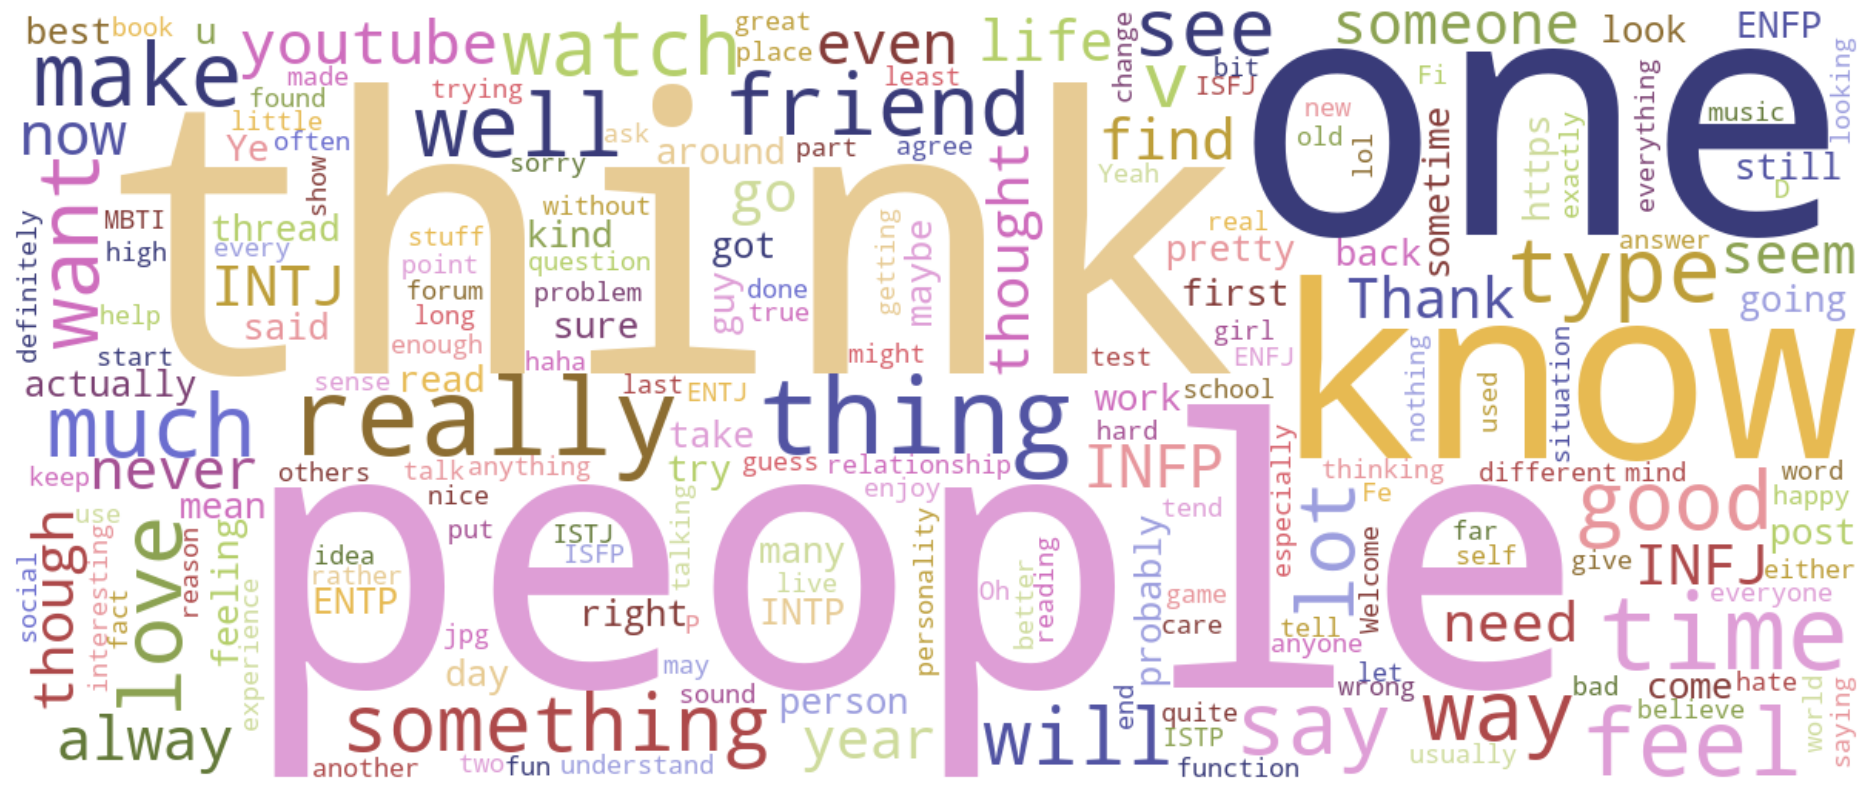

In [10]:
# 전체 post 단어구름 시각화
from wordcloud import WordCloud
wc = WordCloud(width=1200, height=500, 
                         collocations=False, background_color="white", 
                         colormap="tab20b").generate(" ".join(word))

plt.figure(figsize=(25,10))
# generate word cloud, interpolation 
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

C:\Users\a\AppData\Local\Temp\ipykernel_29916\3691994039.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax[k] = plt.subplot(4, 4, k + 1)


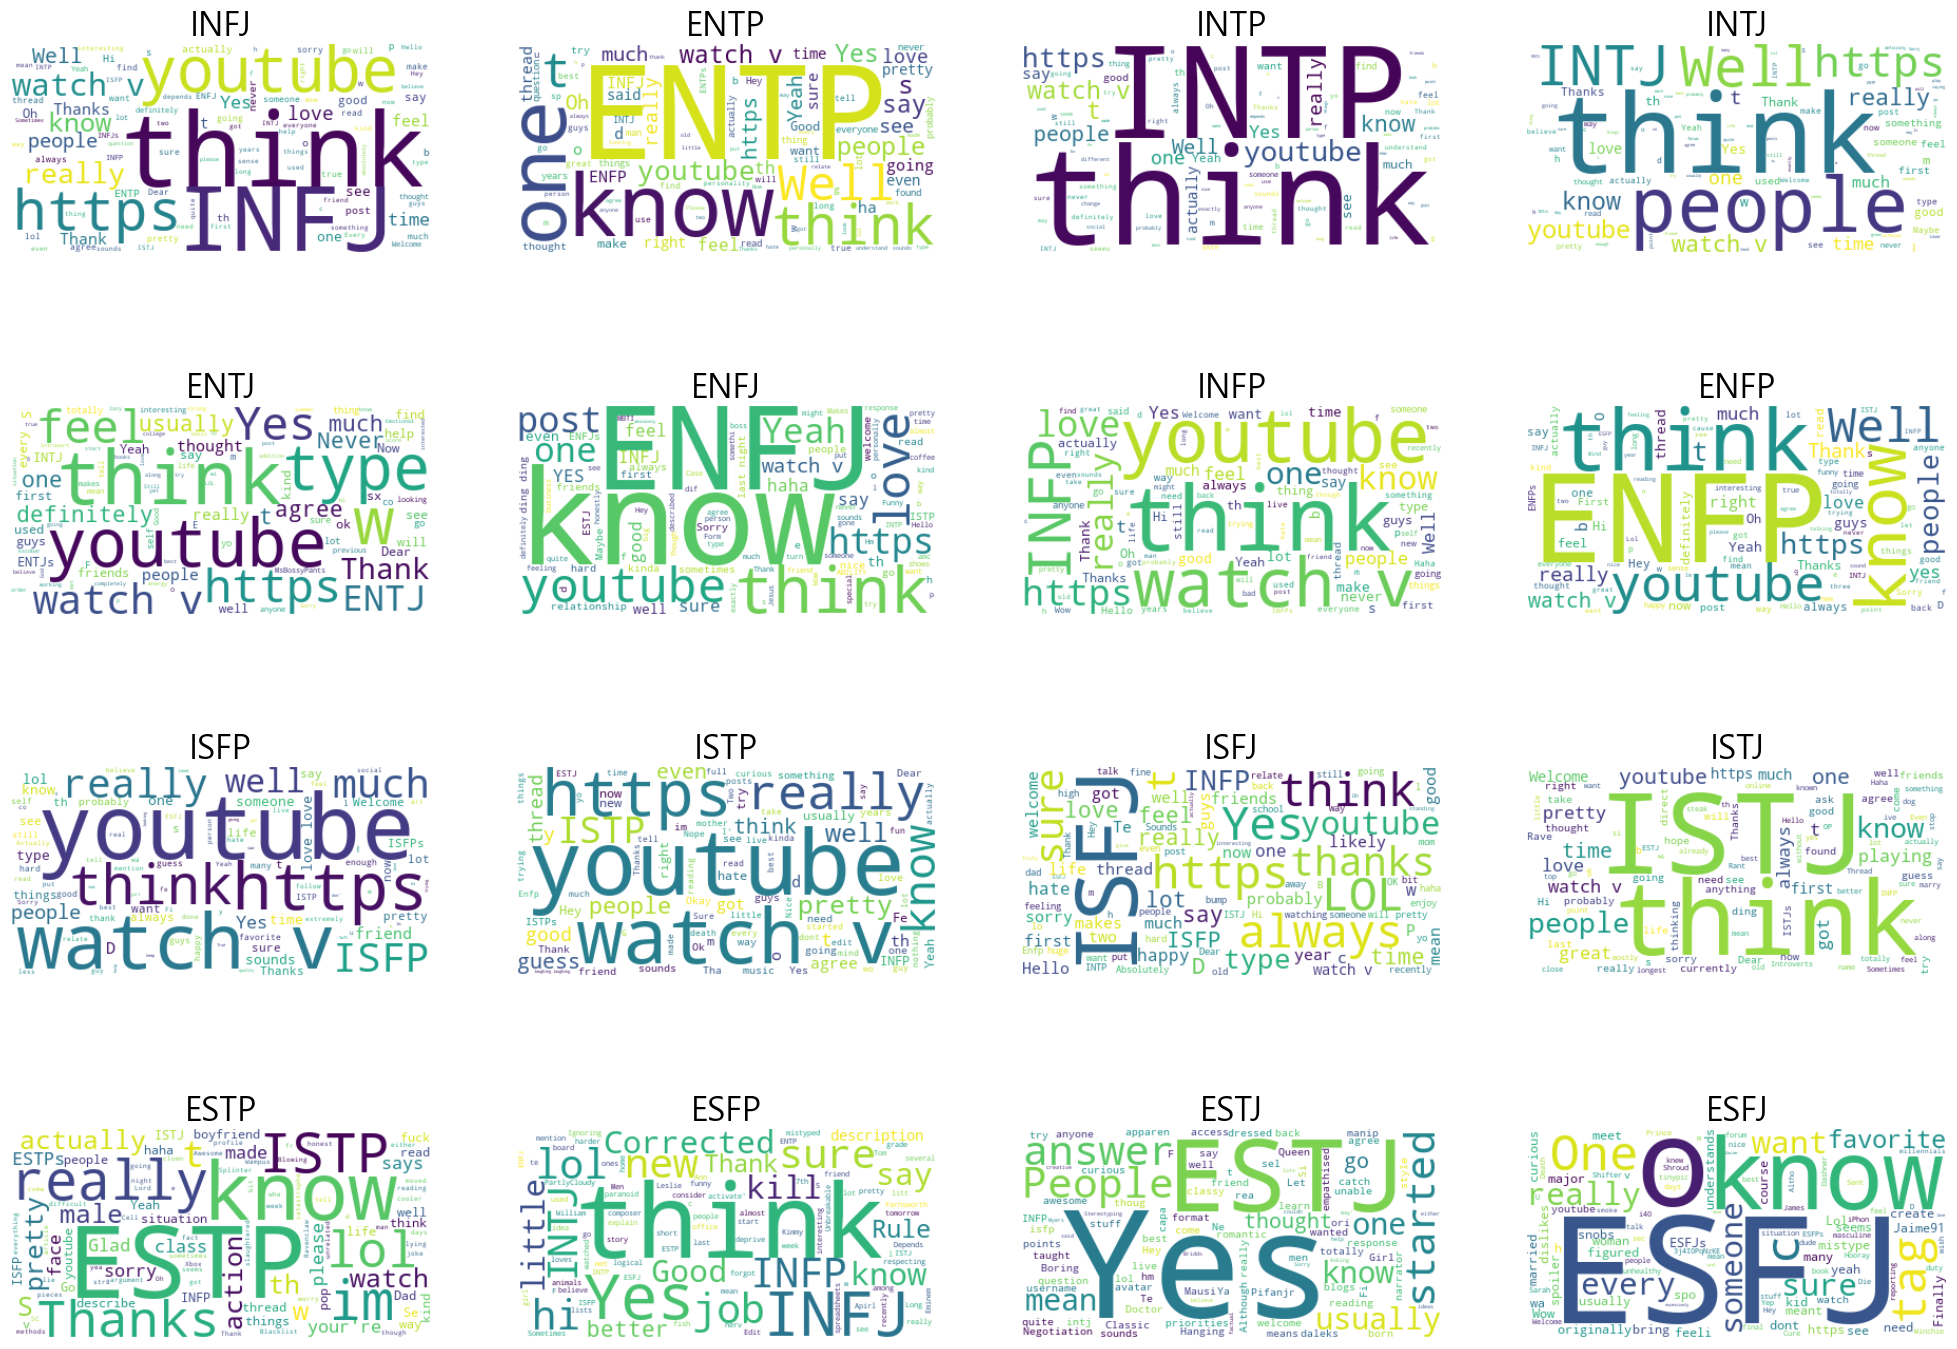

In [11]:
# mbti 타입별 단어구름 시각화
fig, ax = plt.subplots(len(mbti_01['type'].unique()), sharex=True, figsize=(25, 18)) 
k = 0
for i in mbti_01['type'].unique():    
    df_4 = mbti_01[mbti_01['type'] == i]
    wordcloud = WordCloud(background_color = 'white',max_words=100, relative_scaling=1, normalize_plurals=False).generate(df_4['posts'].to_string())
    ax[k] = plt.subplot(4, 4, k + 1)
    plt.imshow(wordcloud, interpolation='bilinear')
    ax[k].set_title(i, fontsize=24)
    ax[k].axis("off")
    k += 1

fig.patch.set_facecolor('white')
plt.show()

### 데이터 전처리

In [12]:
def preprocess_text(text):
    # ||| 로 나뉘어 있는 글 나누기
    text = text.replace('|||', ' ')
    
    # url 주소 삭제  
    text = re.sub(r'https?:\/\/.*?[\s+]', ' ', text)
    
    # 길이가 1~2인 단어들을 정규 표현식을 이용하여 삭제
    text = re.sub(r'\W*\b\w{1,2}\b', '', text)
    
    # 영어가 아닌 문자 공백으로 대체
    text = re.sub('[^a-zA-Z]', ' ', text)
    
    # 영문소문자 변경
    text = text.lower()
    
    # Remove punctuation : 특수문자 제거
    text = ''.join(ch for ch in text if ch not in string.punctuation)
    
    # mbti 이름 제거
    mbti_types = ["enfj", "enfp", "entj", "entp", "esfj", "esfp", "estj", "estp",
                  "infj", "infp", "intj", "intp", "isfj", "isfp", "istj", "istp"]  
    for mbti_type in mbti_types:
        text = text.replace(mbti_type, ' ')
    
    # 공백 제거
    text = ' '.join(text.split())
    
    # 불용어 제거
    stop_words = set(stopwords.words('english'))
    text = ' '.join(word for word in text.split() if word not in stop_words)
    
    return text

In [13]:
# 전처리 적용
mbti_01['posts'] = mbti_01['posts'].apply(preprocess_text)

In [14]:
# 텍스트 데이터 수치로 변경
tfidf = TfidfVectorizer(max_features = 5000, min_df=2, max_df=0.5)
X = tfidf.fit_transform(mbti_01['posts'])

In [15]:
# 타겟 labelencoder
label_encoder = LabelEncoder()
target = mbti_01['type']
y = label_encoder.fit_transform(target)

### 모델 훈련

In [16]:
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=target, random_state=42)

print((x_train.shape), (y_train.shape), (x_test.shape), (y_test.shape))

(6072, 5000) (6072,) (2603, 5000) (2603,)


#### Naive Bayes 분류기

In [17]:
nb = MultinomialNB()
nb_model = nb.fit(X= x_train, y = y_train)

# 학습 model 평가 : 테스트셋 이용
y_pred = nb_model.predict(X = x_test)

# 분류정확도 
acc = accuracy_score(y_true = y_test, y_pred = y_pred)
print('분류정확도 :', acc)

분류정확도 : 0.30272762197464465


#### 로지스틱 회귀

In [18]:
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)

y_pred = lr_model.predict(x_test)

# 분류정확도 
acc = accuracy_score(y_true = y_test, y_pred = y_pred)
print('분류정확도 :', acc)

분류정확도 : 0.34767575873991546


C:\Users\a\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### RandomForest 분류기

In [19]:
rf_model = RandomForestClassifier(random_state=123) # default 적용
rf_model.fit(x_train, y_train)

y_pred = rf_model.predict(x_test)

# 분류정확도 
acc = accuracy_score(y_true = y_test, y_pred = y_pred)
print('분류정확도 :', acc)

분류정확도 : 0.2708413369189397


#### XGBoost 분류기

In [20]:
xgb_model = XGBClassifier()
xgb_model.fit(x_train,y_train)

y_pred = xgb_model.predict(x_test)

# 분류정확도 
acc = accuracy_score(y_true = y_test, y_pred = y_pred)
print('분류정확도 :', acc)

분류정확도 : 0.28275067230119094


### 데이터 수가 더 많은 데이터로 교체

In [21]:
data = pd.read_csv(r"D:\bigdata_itwill\semi_project\data\MBTI500.csv")
df = data.copy()
df

posts  type
0       know intj tool use interaction people excuse a...  INTJ
1       rap music ehh opp yeah know valid well know fa...  INTJ
2       preferably p hd low except wew lad video p min...  INTJ
3       drink like wish could drink red wine give head...  INTJ
4       space program ah bad deal meing freelance max ...  INTJ
...                                                   ...   ...
106062  stay frustrate world life want take long nap w...  INFP
106063  fizzle around time mention sure mistake thing ...  INFP
106064  schedule modify hey w intp strong wing underst...  INFP
106065  enfj since january busy schedule able spend li...  INFP
106066  feel like men good problem tell parent want te...  INFP

[106067 rows x 2 columns]

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106067 entries, 0 to 106066
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   posts   106067 non-null  object
 1   type    106067 non-null  object
dtypes: object(2)
memory usage: 1.6+ MB


In [23]:
df.isnull().sum()

posts    0
type     0
dtype: int64

In [24]:
# 데이터 type의 종류
df['type'].unique()

array(['INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP', 'ENFJ', 'ENFP',
       'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP', 'INFJ', 'INFP'],
      dtype=object)

In [25]:
# 타입별 게시글 수
df['type'].value_counts()

type
INTP    24961
INTJ    22427
INFJ    14963
INFP    12134
ENTP    11725
ENFP     6167
ISTP     3424
ENTJ     2955
ESTP     1986
ENFJ     1534
ISTJ     1243
ISFP      875
ISFJ      650
ESTJ      482
ESFP      360
ESFJ      181
Name: count, dtype: int64

mbit 타입별 게시글 수 막대차트

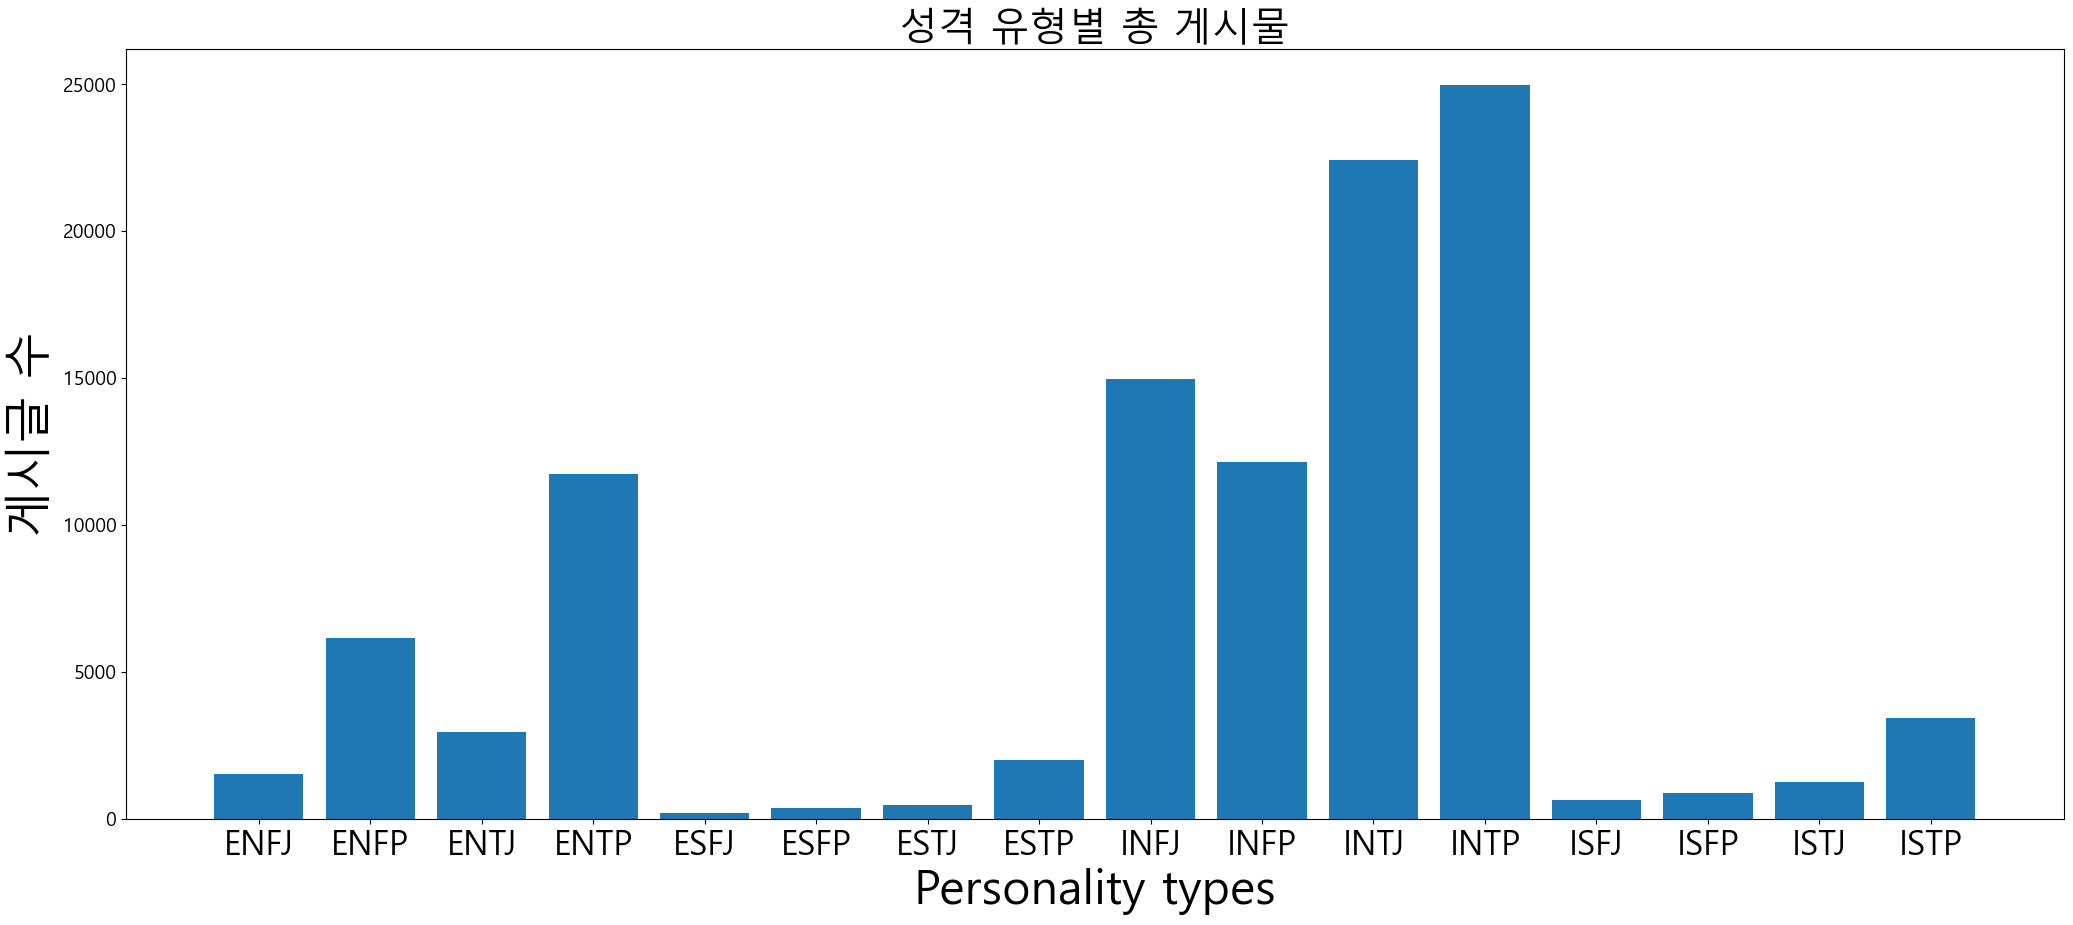

In [26]:
post_type = df.groupby(['type']).count()
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure(figsize=(25, 10))
plt.bar(post_type.index, height=post_type['posts'])
plt.xlabel('Personality types', size=34)
plt.ylabel('게시글 수', size=34)
plt.title('성격 유형별 총 게시물', size=28)
plt.xticks(fontsize=24) 
plt.yticks(fontsize=14)  
plt.show()

### mbti 타입별 단어구름 시각화

C:\Users\a\AppData\Local\Temp\ipykernel_29916\2953363435.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax[k] = plt.subplot(4, 4, k + 1)


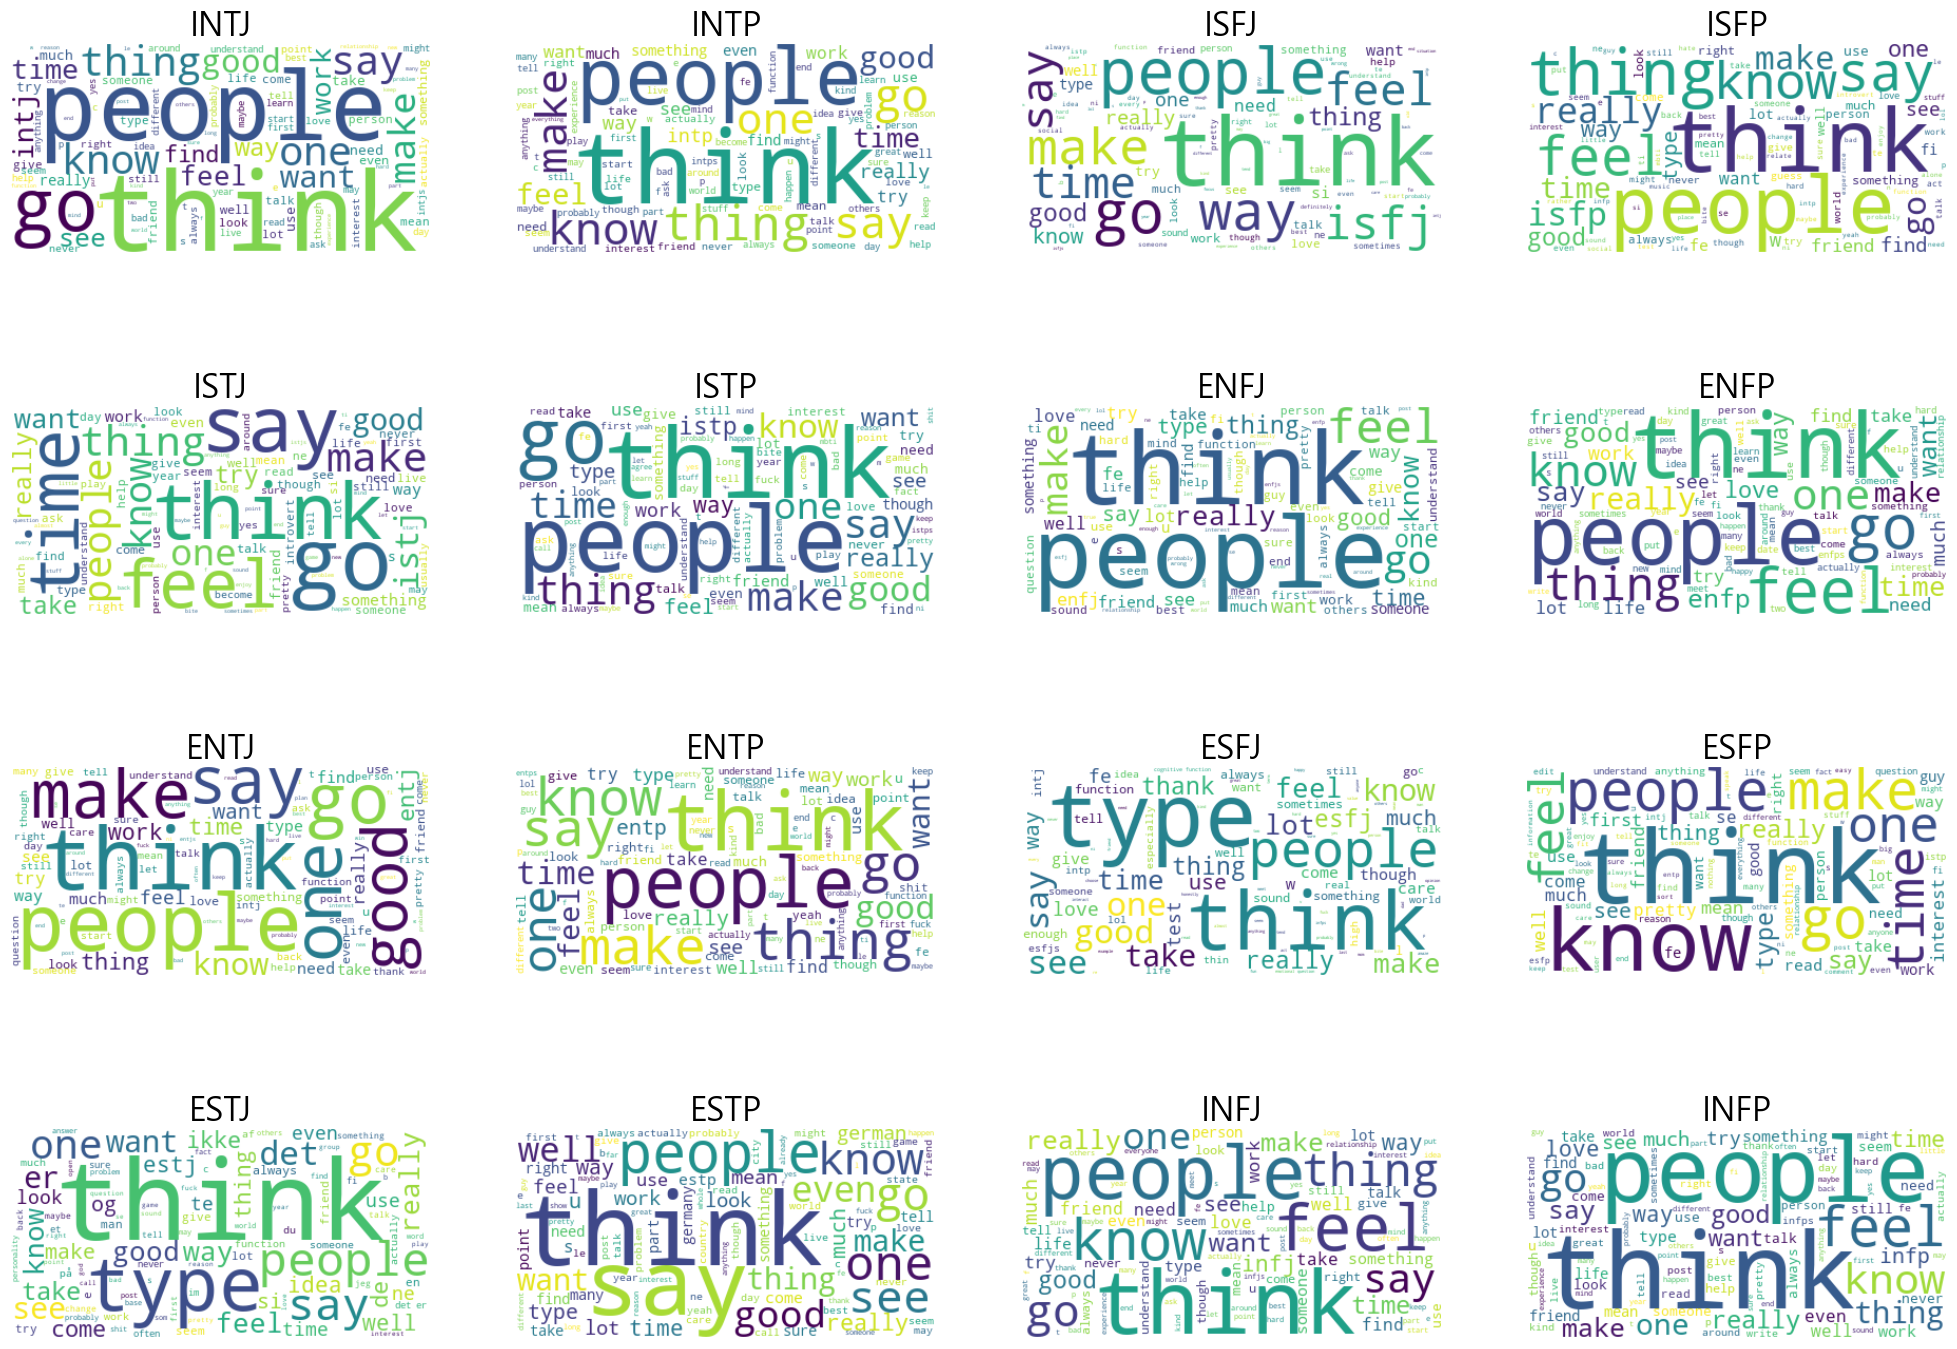

In [27]:
fig, ax = plt.subplots(len(df['type'].unique()), sharex=True, figsize=(25, 18)) 
k = 0
for i in df['type'].unique():    
    df_5 = df[df['type'] == i]
    wordcloud = WordCloud(background_color = 'white',max_words=100, relative_scaling=1, normalize_plurals=False).generate(df_5['posts'].to_string())
    ax[k] = plt.subplot(4, 4, k + 1)
    plt.imshow(wordcloud, interpolation='bilinear')
    ax[k].set_title(i, fontsize=24)
    ax[k].axis("off")
    k += 1

fig.patch.set_facecolor('white')
plt.show()

### 데이터 전처리

In [28]:
# 텍스트 데이터 수치로 변경
tfidf = TfidfVectorizer(max_features = 10000, min_df=2, max_df=0.75)
X = tfidf.fit_transform(df['posts'])

In [29]:
# 타겟 labelencoder
label_encoder = LabelEncoder()
target = df['type']
y = label_encoder.fit_transform(target)

### 모델 훈련

In [30]:
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=target, random_state=42)

print((x_train.shape), (y_train.shape), (x_test.shape), (y_test.shape))

(74246, 10000) (74246,) (31821, 10000) (31821,)


#### Naive Bayes 분류기

In [31]:
nb = MultinomialNB()
nb_model = nb.fit(X= x_train, y = y_train)

# 학습 model 평가 : 테스트셋 이용
y_pred = nb_model.predict(X = x_test)

# 분류정확도 
acc = accuracy_score(y_true = y_test, y_pred = y_pred)
print('분류정확도 :', acc)

분류정확도 : 0.5864366298984947


#### 로지스틱 회귀

In [32]:
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)

y_pred = lr_model.predict(x_test)

# 분류정확도 
acc = accuracy_score(y_true = y_test, y_pred = y_pred)
print('분류정확도 :', acc)

분류정확도 : 0.8202444926306527


C:\Users\a\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### RandomForest 분류기

In [33]:
rf_model = RandomForestClassifier(random_state=123) # default 적용
rf_model.fit(x_train, y_train)

y_pred = rf_model.predict(x_test)

# 분류정확도 
acc = accuracy_score(y_true = y_test, y_pred = y_pred)
print('분류정확도 :', acc)

분류정확도 : 0.6690236007667892


#### XGBoost 분류기

In [34]:
xgb_model = XGBClassifier()
xgb_model.fit(x_train,y_train)

y_pred = xgb_model.predict(x_test)

# 분류정확도 
acc = accuracy_score(y_true = y_test, y_pred = y_pred)
print('분류정확도 :', acc)

분류정확도 : 0.7912384903051444


### MBTI 각 유형을 이분화 하여 모델훈련

In [35]:
# MBTI 유형을 나타내는 열을 이분화하여 새로운 열을 생성
df['I/E'] = df['type'].apply(lambda x: 1 if 'I' in x else 0)
df['N/S'] = df['type'].apply(lambda x: 1 if 'N' in x else 0)
df['T/F'] = df['type'].apply(lambda x: 1 if 'T' in x else 0)
df['J/P'] = df['type'].apply(lambda x: 1 if 'J' in x else 0)

In [36]:
df

posts  type  I/E  N/S  \
0       know intj tool use interaction people excuse a...  INTJ    1    1   
1       rap music ehh opp yeah know valid well know fa...  INTJ    1    1   
2       preferably p hd low except wew lad video p min...  INTJ    1    1   
3       drink like wish could drink red wine give head...  INTJ    1    1   
4       space program ah bad deal meing freelance max ...  INTJ    1    1   
...                                                   ...   ...  ...  ...   
106062  stay frustrate world life want take long nap w...  INFP    1    1   
106063  fizzle around time mention sure mistake thing ...  INFP    1    1   
106064  schedule modify hey w intp strong wing underst...  INFP    1    1   
106065  enfj since january busy schedule able spend li...  INFP    1    1   
106066  feel like men good problem tell parent want te...  INFP    1    1   

        T/F  J/P  
0         1    1  
1         1    1  
2         1    1  
3         1    1  
4         1    1  
...     ...  ...  
106062    0    0  
106063    0    0  
106064    0    0  
106065    0    0  
106066    0    0  

[106067 rows x 6 columns]

In [37]:
# 개별 이분화된 열에 대해 모델 훈련 및 정확도 평가
personality_types = ['I/E', 'N/S', 'T/F', 'J/P']
accuracy_results = {}

for personality in personality_types:
    Y = df[personality].values
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
    model = MultinomialNB()
    model.fit(X= X_train, y = y_train)
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results[personality] = accuracy

accuracy_results

{'I/E': 0.7871217120769304,
 'N/S': 0.931366079004431,
 'T/F': 0.8577040319286006,
 'J/P': 0.7457339492787781}

In [38]:
personality_types = ['I/E', 'N/S', 'T/F', 'J/P']
accuracy_results = {}

for personality in personality_types:
    Y = df[personality].values
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
    model = LogisticRegression()
    model.fit(X= X_train, y = y_train)
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results[personality] = accuracy

accuracy_results

C:\Users\a\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'I/E': 0.9035228308349832,
 'N/S': 0.9577323151378021,
 'T/F': 0.9245466830080764,
 'J/P': 0.865654756293014}

In [39]:
personality_types = ['I/E', 'N/S', 'T/F', 'J/P']
accuracy_results = {}

for personality in personality_types:
    Y = df[personality].values
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
    model = RandomForestClassifier(random_state=123)
    model.fit(X= X_train, y = y_train)
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results[personality] = accuracy

accuracy_results

{'I/E': 0.8201502152666478,
 'N/S': 0.9298890669683543,
 'T/F': 0.8342918198673832,
 'J/P': 0.8091826152540775}

In [40]:
personality_types = ['I/E', 'N/S', 'T/F', 'J/P']
accuracy_results = {}

for personality in personality_types:
    Y = df[personality].values
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
    model = XGBClassifier()
    model.fit(X= X_train, y = y_train)
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results[personality] = accuracy

3accuracy_results

{'I/E': 0.9015744319788819,
 'N/S': 0.9593350303258854,
 'T/F': 0.9061940228151221,
 'J/P': 0.866691807297068}

### 새로운 post 예측

In [41]:
my_post = "I am deeply driven by a purpose that goes beyond the surface, seeking to make a meaningful impact in the world through my work and personal interactions. My approach to life is characterized by a deep empathy for others, an intuitive understanding of human dynamics, and a strong desire to contribute to the greater good. My vision is to be part of initiatives that not only challenge me intellectually but also align with my core values of integrity, compassion, and innovation.Throughout my experiences, I have honed my ability to listen attentively and communicate effectively, skills that have allowed me to connect with individuals from diverse backgrounds and perspectives. I am particularly drawn to roles that enable me to utilize my insights into human behavior to foster understanding and positive change. My analytical skills, coupled with a creative mindset, allow me to approach problems from unique angles, finding solutions that are both effective and ethically sound.As an advocate for lifelong learning, I continuously seek out opportunities to grow both personally and professionally. I am deeply reflective, constantly evaluating my experiences to glean lessons that can inform future decisions. This introspective nature has equipped me with a profound understanding of my strengths and areas for growth, enabling me to navigate challenges with resilience and grace.In collaborative environments, I strive to create a sense of harmony and inclusivity, believing that the best outcomes are achieved when every voice is heard and valued. My leadership style is characterized by a quiet confidence and a focus on empowering others, fostering a culture of mutual respect and shared purpose.I am eager to contribute to an organization that values innovation, ethical responsibility, and a commitment to making a positive difference in the world. My goal is to apply my unique blend of empathy, strategic thinking, and dedication to meaningful causes, helping to drive forward initiatives that have a lasting impact on communities and society at large."

In [42]:
my_post

'I am deeply driven by a purpose that goes beyond the surface, seeking to make a meaningful impact in the world through my work and personal interactions. My approach to life is characterized by a deep empathy for others, an intuitive understanding of human dynamics, and a strong desire to contribute to the greater good. My vision is to be part of initiatives that not only challenge me intellectually but also align with my core values of integrity, compassion, and innovation.Throughout my experiences, I have honed my ability to listen attentively and communicate effectively, skills that have allowed me to connect with individuals from diverse backgrounds and perspectives. I am particularly drawn to roles that enable me to utilize my insights into human behavior to foster understanding and positive change. My analytical skills, coupled with a creative mindset, allow me to approach problems from unique angles, finding solutions that are both effective and ethically sound.As an advocate f

In [43]:
my_post = preprocess_text(my_post)
my_post

'deeply driven purpose goes beyond surface seeking make meaningful impact world work personal interactions approach life characterized deep empathy others intuitive understanding human dynamics strong desire contribute greater good vision part initiatives challenge intellectually also align core values integrity compassion innovation throughout experiences honed ability listen attentively communicate effectively skills allowed connect individuals diverse backgrounds perspectives particularly drawn roles enable utilize insights human behavior foster understanding positive change analytical skills coupled creative mindset allow approach problems unique angles finding solutions effective ethically sound advocate lifelong learning continuously seek opportunities grow personally professionally deeply reflective constantly evaluating experiences glean lessons inform future decisions introspective nature equipped profound understanding strengths areas growth enabling navigate challenges resil

In [44]:
# 텍스트 데이터 수치로 변경
my_post_tfidf = tfidf.transform([my_post])

In [45]:
personality_types = ['I/E', 'N/S', 'T/F', 'J/P']
result = []

for personality in personality_types:
    Y = df[personality].values
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
    model = LogisticRegression()
    model.fit(X= X_train, y = y_train)
    
    y_pred = model.predict(my_post_tfidf)
    result.append(y_pred[0]) 
    
print(result)

C:\Users\a\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[1, 1, 0, 1]


In [46]:
# 성격 유형 매핑
mbti_type_mapping = {
    (0, 0, 0, 0): 'ESFP',
    (0, 0, 0, 1): 'ESFJ',
    (0, 0, 1, 0): 'ESTP',
    (0, 0, 1, 1): 'ESTJ',
    (0, 1, 0, 0): 'ENFP',
    (0, 1, 0, 1): 'ENFJ',
    (0, 1, 1, 0): 'ENTP',
    (0, 1, 1, 1): 'ENTJ',
    (1, 0, 0, 0): 'ISFP',
    (1, 0, 0, 1): 'ISFJ',
    (1, 0, 1, 0): 'ISTP',
    (1, 0, 1, 1): 'ISTJ',
    (1, 1, 0, 0): 'INFP',
    (1, 1, 0, 1): 'INFJ',
    (1, 1, 1, 0): 'INTP',
    (1, 1, 1, 1): 'INTJ',
}

# 결과를 튜플로 변환
prediction_tuple = tuple(result)

# MBTI 성격 유형 예측
mbti_prediction = mbti_type_mapping[prediction_tuple]
print(mbti_prediction)

INFJ
